### Module import

In [1]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torchvision.utils import make_grid, save_image

from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Load image

In [2]:
from glob import glob

In [3]:
img_dir = "C:\\wRockSpace\\Foolers\\DATA\\"
images_path = glob(img_dir + '*.png')

In [4]:
images = [ PIL.Image.open(p) for p in images_path]

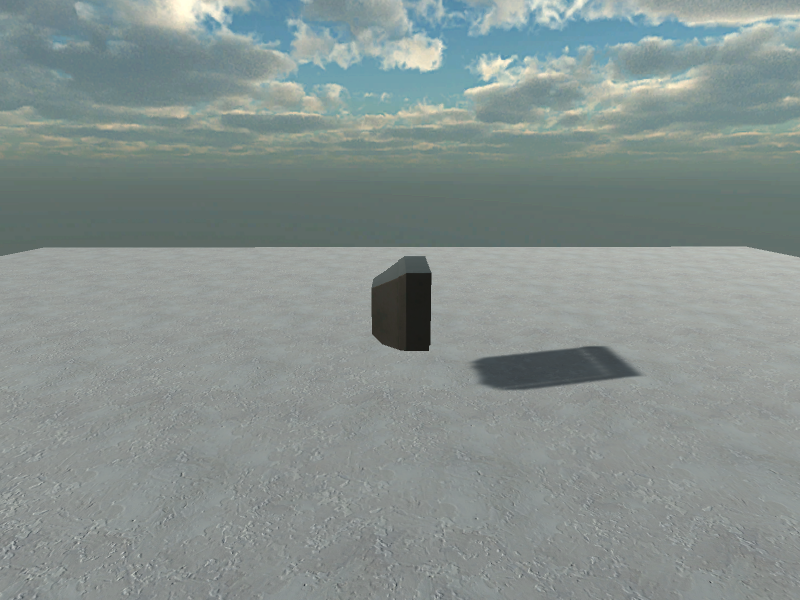

In [6]:
images[20]

### preprocess image

In [7]:
sample = images[20]

In [8]:
torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(sample).to(device)
normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]

In [9]:
vgg = models.vgg16(pretrained=True)
vgg.to(device).eval()

config = dict(model_type='vgg', arch=vgg, layer_name='features_29')
cam    = [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]

In [10]:
def get_heatmaps(torch_img, normed_torch_img):
  results = []

  gradcam, gradcam_pp = cam
  mask, _ = gradcam(normed_torch_img)
  heatmap, result = visualize_cam(mask, torch_img)

  mask_pp, _ = gradcam_pp(normed_torch_img)
  heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)

  results.extend([torch_img.cpu(), heatmap, heatmap_pp, result, result_pp])
  
  return transforms.ToPILImage()(results[1]), transforms.ToPILImage()(results[2])

In [11]:
import os

In [12]:
for p in images_path:
  sample =  PIL.Image.open(p)
  base_path   = os.path.dirname(os.path.abspath(p))
  image_name  = os.path.basename(os.path.abspath(p)).split('.')[0]

  result_name = 'Heat-' + image_name + '-A.png'
  result_name2= 'Heat-' + image_name + '-B.png'

  torch_img = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])(sample).to(device)
  normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]
  A, B = get_heatmaps(torch_img=torch_img, normed_torch_img=normed_torch_img)
  A = A.resize(sample.size)
  A.save(os.path.join(base_path, result_name))
  B = B.resize(sample.size)
  B.save(os.path.join(base_path, result_name2))

C:\Users\taesiri\anaconda3\envs\deep36\lib\site-packages\torch\nn\functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
